<a href="https://colab.research.google.com/github/RandyT97/CAP4630/blob/master/HW2Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_images.shape


(60000, 784)

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
train_images.shape

(60000, 784)

In [0]:
train_images[0].shape

def create_height(image):
  firstRow = 28; #Maxmimum row value
  lastRow = 0;   #Minimum row value
  for row in range(image.shape[0]):
    for col in range(image.shape[1]):
      if image[row][col] !=0 :
        if row < firstRow:
          firstRow = row
        if row > lastRow:
          lastRow = row
  return (lastRow-firstRow)/28 #normalized
def create_width(image):
  firstCol = 28; #Maxmimum row value
  lastCol = 0;   #Minimum row value
  for row in range(image.shape[0]):
    for col in range(image.shape[1]):
      if image[row][col] !=0 :
        if col < firstCol:
          firstCol = row
        if col > lastCol:
          lastCol = row
  return (lastCol-firstCol)/28 #normalized

width = np.array([create_width(item) for item in train_images_original])
height = np.array([create_height(item) for item in train_images_original])

test_width = np.array([create_width(item) for item in test_images_original])
test_height = np.array([create_height(item) for item in test_images_original])

In [0]:
print(test_images.shape)
print(height.shape)
print(width.shape)
final_train_images = np.column_stack((train_images, height, width))
final_test_images = np.column_stack((test_images, test_height, test_width))

(10000, 784)
(60000,)
(60000,)


In [0]:
from keras import models
from keras import layers

print (test_images.shape)
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=((28 * 28)+2,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 10
history = network.fit(final_train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(final_test_images, test_labels))

(10000, 784)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               402944    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                5130      
Total params: 408,074
Trainable params: 408,074
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 8s 130us/step - loss: 0.2572 - acc: 0.9252 - val_loss: 0.1288 - val_acc: 0.9617
Epoch 2/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.1030 - acc: 0.9691 - val_loss: 0.0910 - val_acc: 0.9727
Epoch 3/10
60000/60000 [==============================] - 3s 49us/ste

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

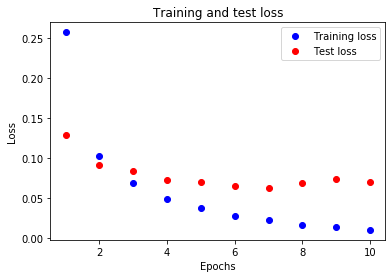

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

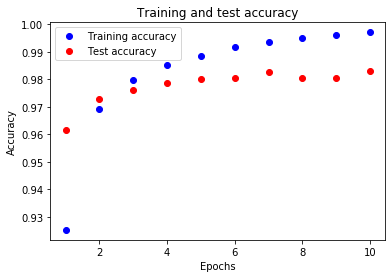

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()